## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [2]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
office_episodes = pd.read_csv('datasets/office_episodes.csv')
office_episodes.head(5)

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


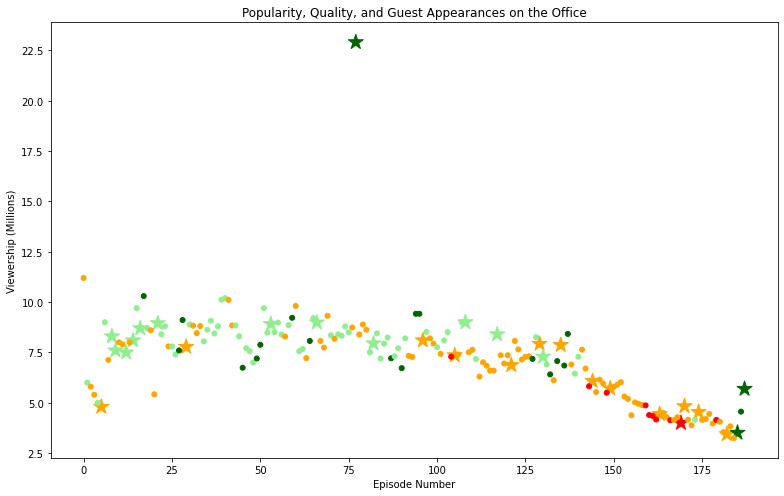

In [4]:
def color_define_following_ratings(x):
    if x < 0.25:
        color = 'red'
    elif x < 0.5:
        color = 'orange'
    elif x < 0.75:
        color = 'lightgreen'
    else:
        color = 'darkgreen'
        
    return color

office_episodes['color'] = office_episodes['scaled_ratings'].apply(color_define_following_ratings)

def marker_size_define_following_guest(x):
    if x:
        size = 250
    else:
        size = 25
    return size

office_episodes['marker_size'] = office_episodes['has_guests'].apply(marker_size_define_following_guest)

office_episodes_with_guests = office_episodes[office_episodes['has_guests']]
office_episodes_without_guests = office_episodes[office_episodes['has_guests']==False]

fig = plt.figure(figsize=(11,7))

plt.scatter(office_episodes_with_guests['episode_number'], office_episodes_with_guests['viewership_mil'], c=office_episodes_with_guests['color'],
            s=office_episodes_with_guests['marker_size'], marker='*')
plt.scatter(office_episodes_without_guests['episode_number'], office_episodes_without_guests['viewership_mil'], c=office_episodes_without_guests['color'],
            s=office_episodes_without_guests['marker_size'])

plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')

plt.show()

In [45]:
maximum = office_episodes[office_episodes['has_guests']]['viewership_mil'].max()

idx = office_episodes[office_episodes['viewership_mil'] == maximum]['episode_number']

top_star = office_episodes['guest_stars'][idx].split(',')[0]
# print(top_star)

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object


AttributeError: 'Series' object has no attribute 'split'